In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

In [38]:
df=pd.read_csv(r"E:\InsurancePrediction\notebooks\data\insurance.csv")

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [40]:
df.shape

(1338, 7)

### **EDA:-**

In [41]:
col=df.columns.to_list()
col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [45]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

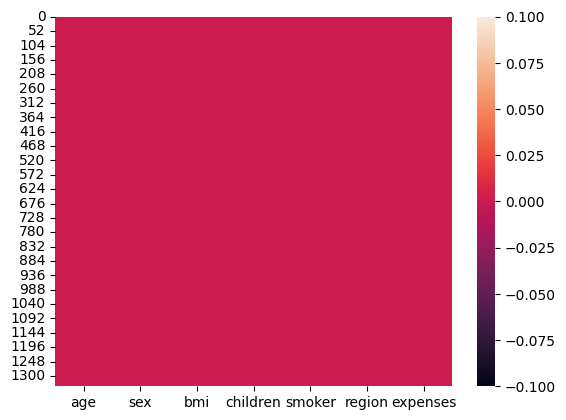

In [46]:
sns.heatmap(df.isnull())

in the given datasets, no one null value present in datasets file.

### Distribution of given datasets:-

<Axes: xlabel='age', ylabel='Count'>

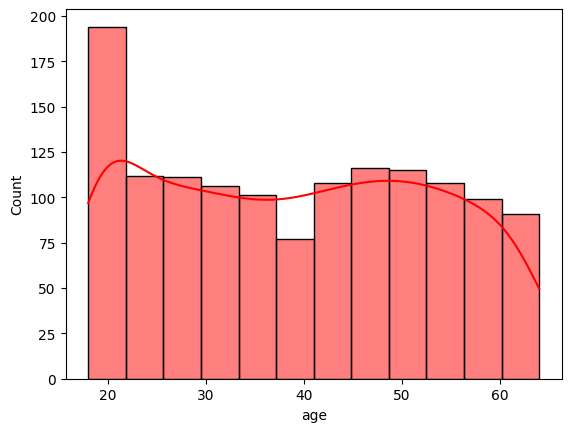

In [47]:
sns.histplot(df["age"],kde=True,color="red")

checking outlier in age column

<Axes: >

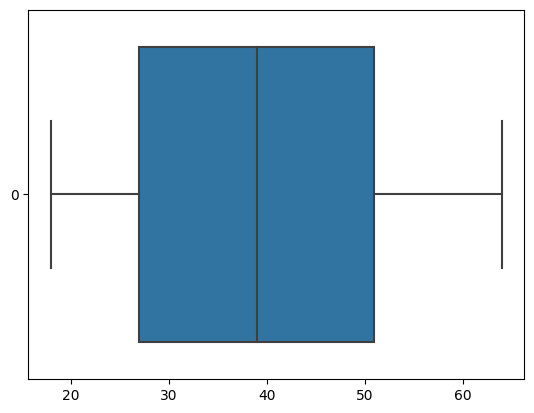

In [48]:
sns.boxplot(df["age"],orient='h')


#### Findings:
1. The variable age is Uniformally distributed from 18 to 64
2. There are no outliers present in data

In [49]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

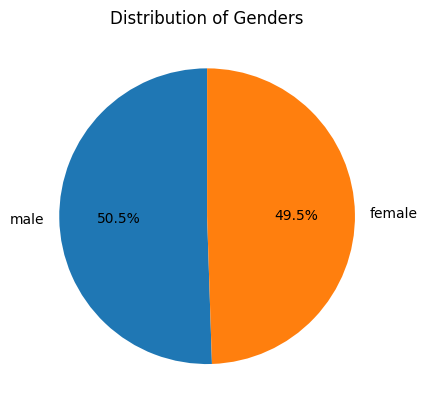

In [50]:
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.show()

#### sex ratio in given datasets is define as there are 676 male and 662 female.

<Axes: xlabel='bmi', ylabel='Count'>

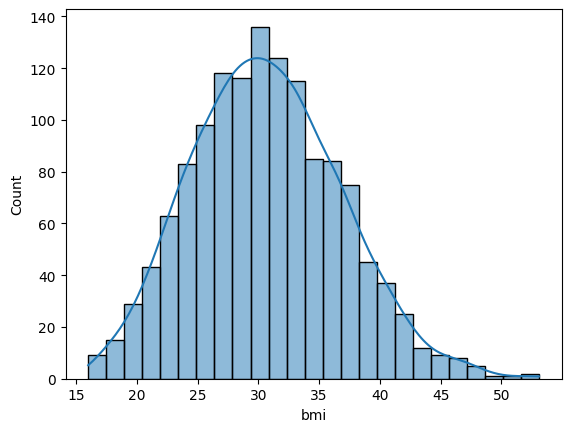

In [51]:
sns.histplot(df["bmi"],kde=True)

<Axes: >

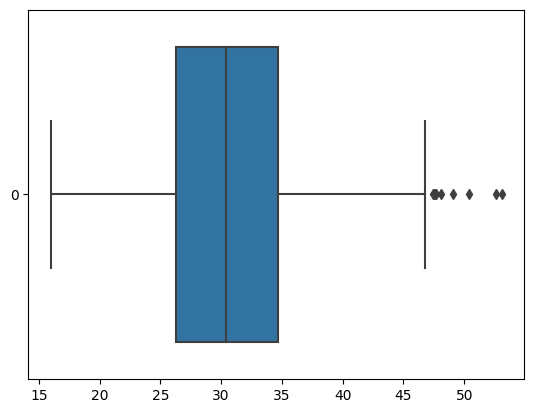

In [52]:
sns.boxplot(df["bmi"],orient="h")

#### here we are find a normal distribution of our bmi columns.
#### ooutliers are presents in our bmi columns

In [53]:
mean=np.mean(df["bmi"])
std=np.std(df["bmi"])

In [54]:
mean,std

(30.66547085201794, 6.0961028469261755)

In [55]:
lower = mean - 3*std
print('lower:',lower)
upper = mean + 3*std
print('upper:',upper)

lower: 12.377162311239413
upper: 48.95377939279646


In [56]:
#applying z-score method
df[(df['bmi'] <lower ) | (df['bmi'] > upper)]

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
847,23,male,50.4,1,no,southeast,2438.06
1047,22,male,52.6,1,yes,southeast,44501.40
1317,18,male,53.1,0,no,southeast,1163.46


In [57]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [58]:
df["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

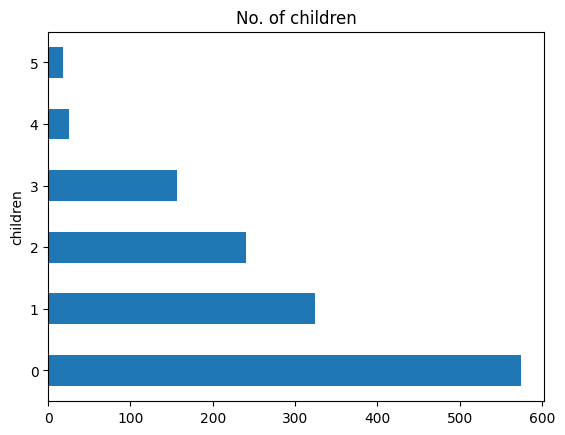

In [59]:
df['children'].value_counts().plot(kind='barh')
plt.title('No. of children')
plt.show()

In [60]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

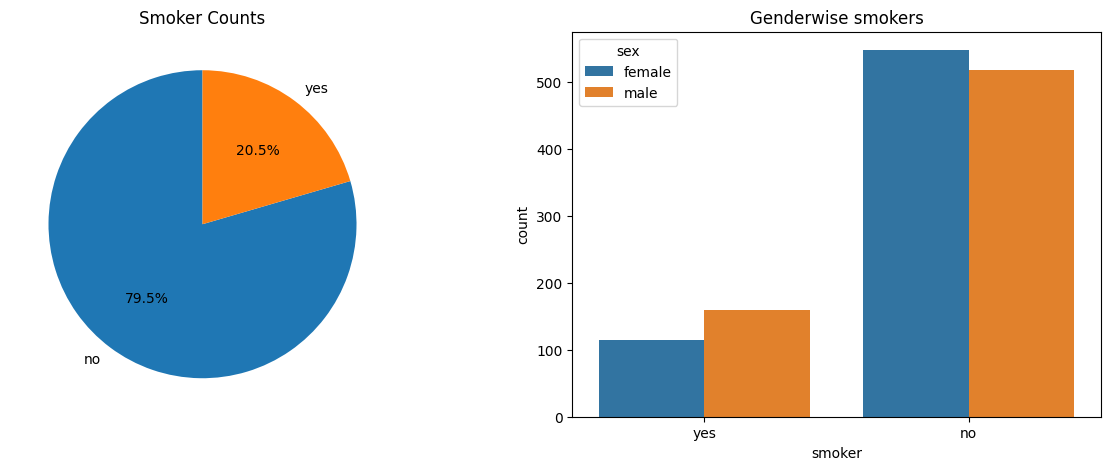

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Smoker Counts")
plt.subplot(1,2,2)
sns.countplot(data=df,x='smoker',hue='sex')
plt.title('Genderwise smokers')
plt.show()

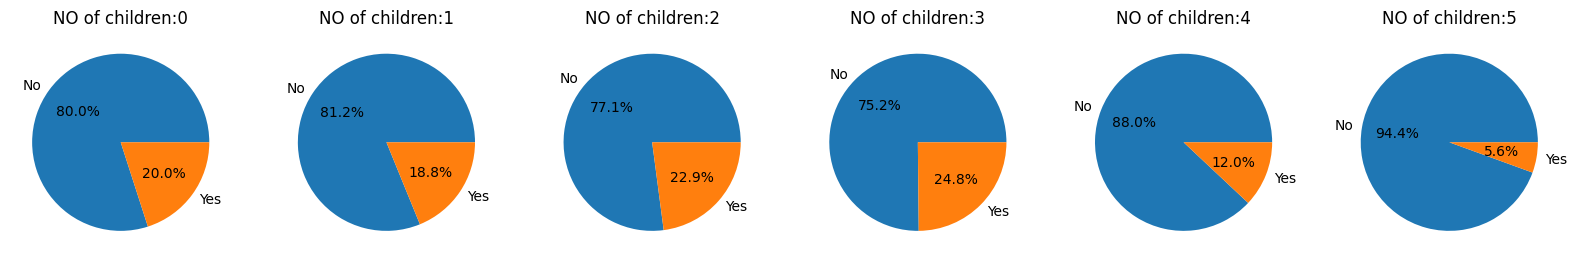

In [62]:
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(20,20))
for i in sorted(df['children'].unique()):
#         print("NO of children:",i,'\n')
        ax[i].pie(df['smoker'][df['children']==i].value_counts() ,autopct='%0.1f%%',labels=["No","Yes"])
        ax[i].set_title(f"NO of children:{i}") 

In [63]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='Count'>

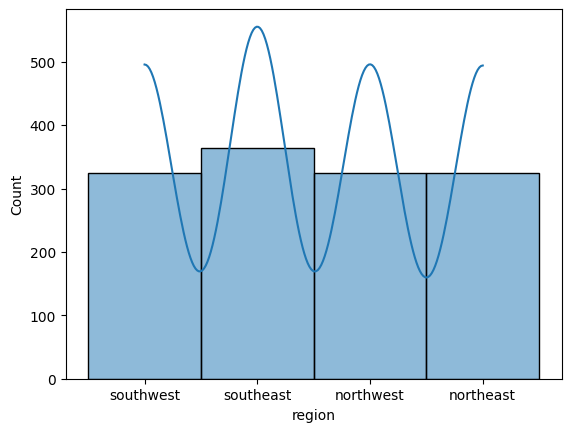

In [64]:
sns.histplot(df["region"],kde=True)

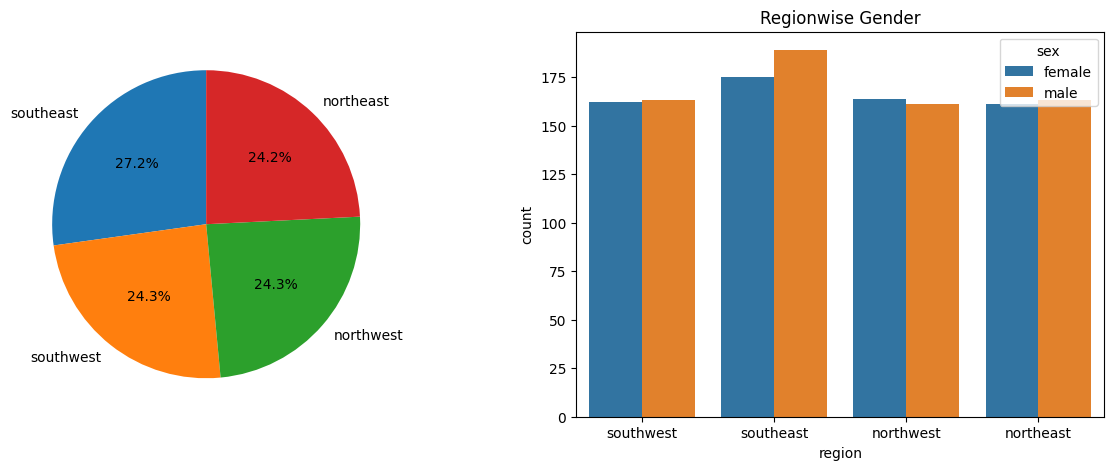

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
region_count=df["region"].value_counts()
plt.pie(region_count,labels=region_count.index,autopct='%1.1f%%', startangle=90)
plt.subplot(1,2,2)
sns.countplot(data=df,x='region',hue='sex')
plt.title('Regionwise Gender')
plt.show() 

<Axes: >

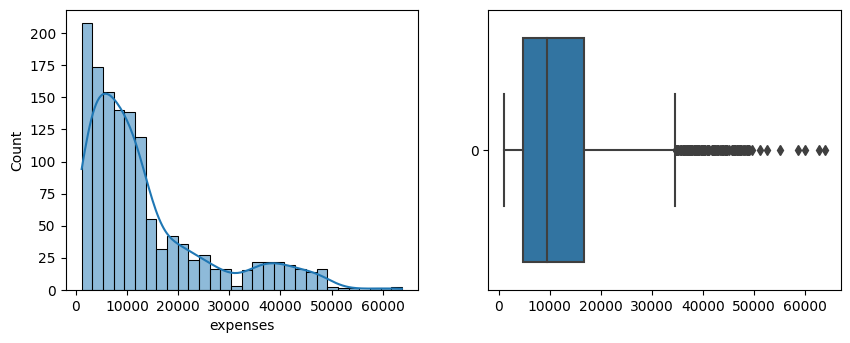

In [66]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(df["expenses"],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df["expenses"],orient="h")

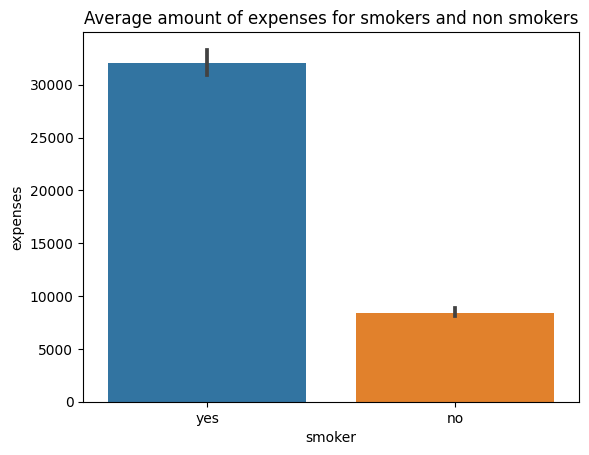

In [67]:
sns.barplot(x=df['smoker'],y=df['expenses'])
plt.title('Average amount of expenses for smokers and non smokers')
plt.show() 

#### here we can find a right skewwd datasets.
#### here we can find out a larger number of outlier present in out datasets.

In [68]:
df.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<Axes: xlabel='expenses', ylabel='children'>

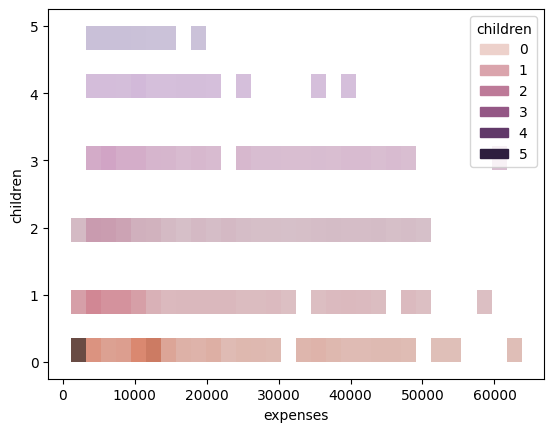

In [69]:
sns.histplot(data =df,x="expenses",y="children",hue="children")